<a href="https://colab.research.google.com/github/shu6h4m/DataMining/blob/main/DataMining_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1** : To compare the performance of three models:
## 1) Decision Tree
## 2) K-NN
## 3) Bayesian classifier

In [68]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn import naive_bayes
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.tree import plot_tree

## Dataset Used : Drug Classification, to check [Click Here](https://www.kaggle.com/prathamtripathi/drug-classification) !
### Let's load this Dataset.. ☺

In [ ]:
shu6h4m = 'https://raw.githubusercontent.com/shu6h4m/DataMining/main/drug200.csv'
df = pd.read_csv(shu6h4m)

#Loading Head
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
#Total Records and attributes
df.shape

(200, 6)

In [ ]:
#So there are 200 records and 6 attributes in the Dataset
#Now let's check other info about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**The dataset has 1 float, 1 integer and 4 object columns.**

### Attribute Description:-

    Age: stores the age of patient
    Sex: stores the gender of patients
    BP: contains blood pressure of patient
    Cholesterol: stores cholesterol of patient
    Na_to_K: contains Sodium to Potassium ratio in blood
    Drug: contains he drug type given to patients

Now let us check for any missing values in this Dataset


In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
#So as it is visible, The dataset doesn't have any null values. Now let us check if there is any duplicate values in it.

duplicate = df[df.duplicated()]
duplicate

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [ ]:
# Find minimum and maximum age

print("Minimum Age is {} years".format(df['Age'].min()))
print("Maximum Age is {} years".format(df['Age'].max()))

Minimum Age is 15 years
Maximum Age is 74 years


In [ ]:
# Find unique values in categorical attributes

print("Sex:", df['Sex'].unique())
print("BP:", df['BP'].unique())
print("Cholesterol:", df['Cholesterol'].unique())
print("Drug:", df['Drug'].unique())

Sex: ['F' 'M']
BP: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']
Drug: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


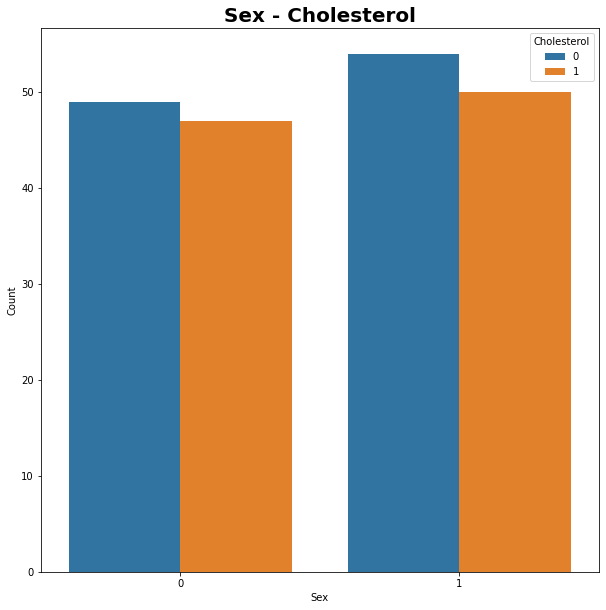

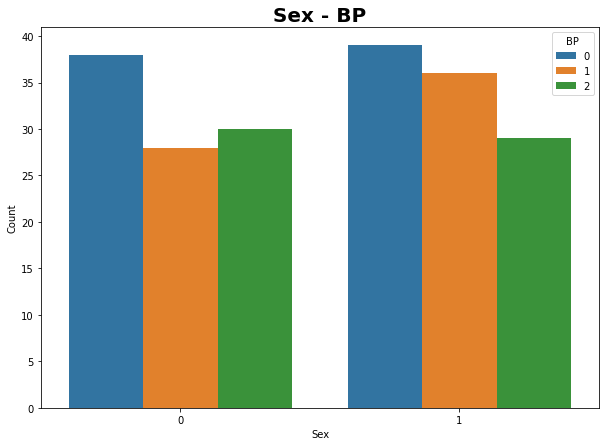

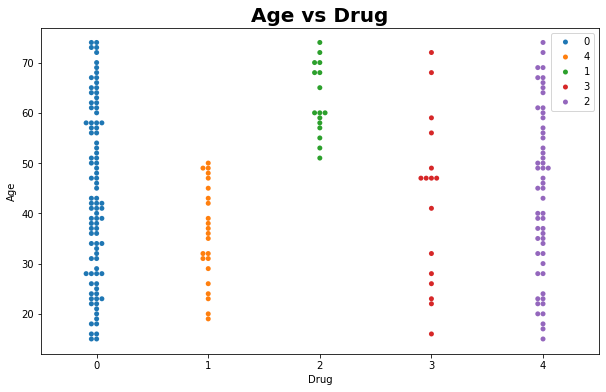

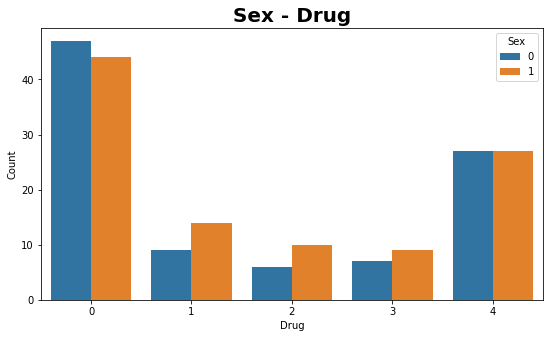

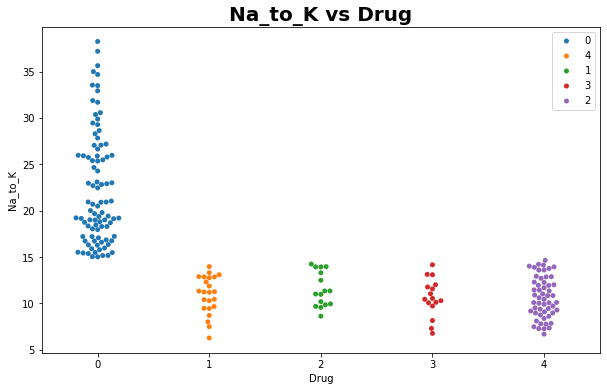

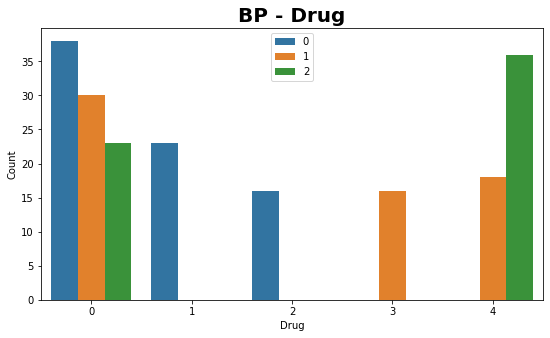

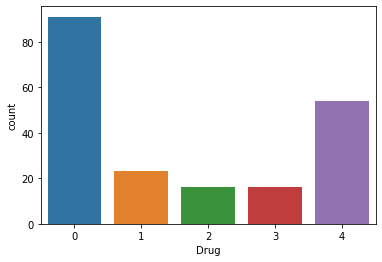

In [77]:
#Anyalying the dataset by ploting various graphs!

# Analyze Cholesterol based on Sex

df_Sex_Cholesterol = df.groupby(["Sex", "Cholesterol"]).size().reset_index(name = "Count")

plt.figure(figsize = (10,10))
sns.barplot(x = "Sex", y = "Count", hue = "Cholesterol", data = df_Sex_Cholesterol)
plt.title("Sex - Cholesterol", fontsize=20, fontweight='bold')
plt.show()


# Analyze BP based on Sex

df_Sex_BP = df.groupby(["Sex", "BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (10,7))
sns.barplot(x = "Sex", y = "Count", hue = "BP", data = df_Sex_BP)
plt.title("Sex - BP", fontsize=20, fontweight='bold')
plt.show()

# Analyze Drug based on Age

plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Age", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Age vs Drug", fontsize=20, fontweight='bold')
plt.show()

# Analyze Drug based on Sex

df_Sex_Drug = df.groupby(["Drug", "Sex"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y = "Count", hue = "Sex", data = df_Sex_Drug)
plt.title("Sex - Drug", fontsize=20, fontweight='bold')
plt.show()


# Analyze Drug based on Na_to_K

plt.figure(figsize = (10,6))
sns.swarmplot(x = "Drug", y = "Na_to_K", data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Na_to_K vs Drug", fontsize=20, fontweight='bold')
plt.show()

# Analyze Drug based on BP

df_Sex_Drug = df.groupby(["Drug", "BP"]).size().reset_index(name = "Count")

plt.figure(figsize = (9,5))
sns.barplot(x = "Drug", y = "Count", hue = "BP", data = df_Sex_Drug)
plt.title("BP - Drug", fontsize=20, fontweight='bold')
plt.legend(loc='upper center')
plt.show()

# Distribution of Drug

sns.countplot(x='Drug', data=df)
plt.xlabel('Drug')


# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder

def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

lables = ['Sex', 'BP', 'Cholesterol', 'Drug']
for i in lables:
    label_encoder(i)


In [ ]:
df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4



### **Modeling: Splitting the data into training and testing set for comparing performances.**


In [ ]:
X = df.iloc[:, :-1]        # independent variable
y = df.iloc[:, -1]         # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 5) (40, 5) (160,) (40,)


## 1)  Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])

In [ ]:
# F1 score

dt_f1_score = f1_score(y_test, y_pred_dt, average='weighted')
dt_f1_score
print("F1 Score is : ",dt_f1_score)
print("_________________________________________________________")
print()
print(classification_report(y_test, y_pred_dt))

F1 Score is :  1.0
_________________________________________________________

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[15,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  0,  5,  0],
       [ 0,  0,  0,  0, 11]])

### **Hence, Decision Tree Classifier shows a 100% accuracy.**

## 2) K-NN Classifier :

In [ ]:
Grid = {'n_neighbors': np.arange(1,100)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid)
knn_cv.fit(X_train, y_train)

print("Hyperparameters Used:", knn_cv.best_params_)
print("Test Score:", knn_cv.score(X_test, y_test))

Hyperparameters Used: {'n_neighbors': 7}
Test Score: 0.65


In [ ]:
y_pred_knn = knn_cv.predict(X_test)
y_pred_knn

array([4, 4, 4, 2, 0, 0, 0, 1, 0, 4, 1, 4, 0, 4, 2, 0, 4, 2, 1, 0, 4, 2,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 4, 4, 0, 1, 0, 2, 1, 0, 4])

In [ ]:
# F1 score

knn_f1_score = f1_score(y_test, y_pred_knn, average='weighted')
knn_f1_score

0.6462348484848486

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.60      0.50      0.55         6
           2       0.20      0.33      0.25         3
           3       1.00      0.20      0.33         5
           4       0.50      0.64      0.56        11

    accuracy                           0.65        40
   macro avg       0.65      0.52      0.52        40
weighted avg       0.72      0.65      0.65        40



Text(0.5, 1.0, 'Accuracy Score: 0.65')

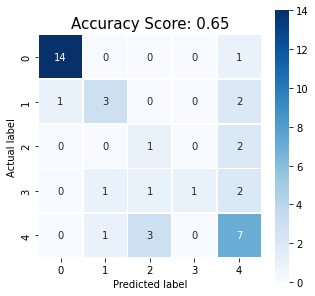

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(knn_cv.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


### **So, K Nearest Neighbors Classifier only gave an accuracy of 65%**


## 3) Naive Bayes Classification :

In [76]:
clf = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
print('Training Score: {:.2f}'.format(clf.score(X_train, y_train)))
print('Testing Score: {:.2f}'.format(clf.score(X_test, y_test)))

scaler = StandardScaler()
scaler.fit(X_train)
x_test_scaled = scaler.transform(X_test)
y_pred_n  = clf.predict(x_test_scaled)
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
nb_acc = 100*nb.score(X_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(X_test), '\n Accuracy:', nb_acc, '%')

#print(classification_report(y_test,y_pred_n))

Training Score: 1.00
Testing Score: 1.00
Naive Bayes Predictions: 
 [4 1 4 3 0 2 0 4 1 4 1 4 3 1 2 0 2 4 3 0 2 4 4 0 0 0 3 4 0 4 0 3 3 0 1 0 4
 1 0 1] 
 Accuracy: 92.5 %


### **Here, Bayesian classifieronly gave an accuracy of 92.5%**

**Hence, on comparing the performance of these models on the given dataset it is concluded that :**

# *Accuracry of DT* **>** *Accuracy of Bayesian Classifier* **>** *Accuracy of K-NN*




---

Submitted by : Subham Sharma

Roll No. : 58

Thankyou ☺
